In [1]:
import pandas as pd

flight_df = pd.read_csv("flights_historical/train_1.csv")

# reformat departure_time
flight_df['departure_time'] = flight_df['departure_time'].apply(str).apply(lambda x: '0'+x if len(x) != 4 else x)

# reformat the dates
flight_df['month'] = flight_df['month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_month'] = flight_df['day_of_month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_week'] = flight_df['day_of_week'].apply(lambda x: x[2:])
flight_df['is_delayed'] = flight_df['is_delayed'].astype('category').cat.codes

flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']] = flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']].apply(pd.to_numeric)

flight_df

,unique_carrier,origin,destination,is_delayed,departure_time,month,day_of_month,day_of_week,distance
0,RQ,ULX,TVQ,0,1143,12,16,5,1587
1,C6,URX,DIE,0,2356,3,22,3,2454
2,WT,HSR,VWP,1,2012,1,14,5,1437
3,NB,UGR,CNY,0,1626,10,14,6,328
4,WT,HTE,RJB,0,1112,5,18,3,957
...,...,...,...,...,...,...,...,...,...
89995,WP,ULQ,MQV,0,2056,6,20,1,448
89996,OZ,FSS,QFT,0,630,12,16,6,618
89997,AG,FPH,MQV,0,1525,1,31,2,83
89998,JG,TVQ,TCA,0,1310,12,6,2,146


In [29]:
# one-hot encoding/dummy variables for categorical data
dummy_df = flight_df.copy()
dummy_df = pd.get_dummies(dummy_df, columns=['unique_carrier', 'origin', 'destination'], drop_first=True)
dummy_df = dummy_df.rename(columns = {'is_delayed': 'target'})

numeric_cols = ['departure_time', 'month', 'day_of_month', 'day_of_week', 'distance']
category_cols = list(set(dummy_df.columns) - set(numeric_cols) - {'target'})
category_cols.sort()



# print(numeric_cols)
# print(category_cols)

dummy_df

,target,departure_time,month,day_of_month,day_of_week,distance,unique_carrier_BN,unique_carrier_C6,unique_carrier_HH,unique_carrier_HL,...,destination_YMV,destination_YPH,destination_YPU,destination_YQF,destination_YQO,destination_YRT,destination_YTL,destination_YTR,destination_YUQ,destination_YVH
0,0,1143,12,16,5,1587,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2356,3,22,3,2454,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2012,1,14,5,1437,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1626,10,14,6,328,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1112,5,18,3,957,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0,2056,6,20,1,448,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89996,0,630,12,16,6,618,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89997,0,1525,1,31,2,83,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89998,0,1310,12,6,2,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# train-test split
from sklearn.model_selection import train_test_split

random_seed = 1147

train_df, test_df = train_test_split(dummy_df,test_size=0.20,random_state=random_seed, stratify=dummy_df['target'])

train_df

,target,departure_time,month,day_of_month,day_of_week,distance,unique_carrier_BN,unique_carrier_C6,unique_carrier_HH,unique_carrier_HL,...,destination_YMV,destination_YPH,destination_YPU,destination_YQF,destination_YQO,destination_YRT,destination_YTL,destination_YTR,destination_YUQ,destination_YVH
7439,0,2118,2,14,1,139,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5518,1,1925,5,12,4,1123,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13990,0,700,7,11,1,239,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64850,0,1252,2,21,1,460,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53230,0,937,9,1,5,525,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37756,0,835,4,17,1,954,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46193,0,536,8,8,1,453,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,1537,7,29,6,340,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30221,0,747,2,15,3,496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# scaling numeric columns

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(train_df[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X_train, y_train = get_features_and_target_arrays(train_df, numeric_cols, category_cols, scaler)
X_test, y_test = get_features_and_target_arrays(test_df, numeric_cols, category_cols, scaler)

In [76]:
# logistic regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train,y_train)

# evaluate/predict

from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
y_pred_lg = log_reg.predict(X_test)

In [83]:
# k-nn, n = 1 (single point prediction)

from sklearn.neighbors import KNeighborsRegressor
knn_1 = KNeighborsRegressor(n_neighbors=1)
knn_1.fit(X_train, y_train)

y_pred_knn1 = knn_1.predict(X_test)

In [86]:
# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred_knn1)
rmse = sqrt(mse)
rmse

0.5250925844289007

In [87]:
# grid search for best k value
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

gridsearch.best_params_

KeyboardInterrupt: 

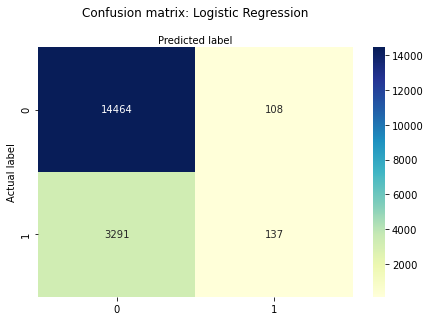

In [77]:
from sklearn import metrics
log_reg_matrix = metrics.confusion_matrix(y_test, y_pred_lg)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def get_confusion_heatmap(matrix, title):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix: ' + title, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    return plt.show()

get_confusion_heatmap(log_reg_matrix, 'Logistic Regression')

In [72]:
def get_performance_metrics(y_test, y_pred, title):
    print('Performance metrics for', title)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    print('Accuracy = {:.5f}'.format(acc))
    print('Precision = {:.5f}'.format(precision))
    print('Recall = {:.5f}'.format(recall))
    print('F1 score = {:.5f}'.format(f1score))
          
    return [acc, precision, recall, f1score]
          
lg_perf = get_performance_metrics(y_test, y_pred_lg, 'Logistic Regression')

Performance metrics for Logistic Regression
Accuracy = 0.81117
Precision = 0.55918
Recall = 0.03996
F1 score = 0.07460


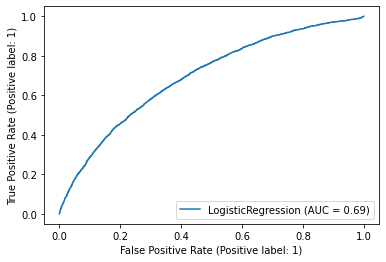

In [55]:
plot_roc_curve(log_reg, X_test, y_test)